In [5]:
import pandas as pd
from plotnine import *

# importing statsmodels (for linear regression in python)
import statsmodels.formula.api as smf

# Load data



In [6]:
from plotnine.data import mtcars
mtcars

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


# Exploratory Data Analysis

In [7]:
# correlation matrix of mtcars
mtcars.corr().round(1)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.0,-0.9,-0.8,-0.8,0.7,-0.9,0.4,0.7,0.6,0.5,-0.6
cyl,-0.9,1.0,0.9,0.8,-0.7,0.8,-0.6,-0.8,-0.5,-0.5,0.5
disp,-0.8,0.9,1.0,0.8,-0.7,0.9,-0.4,-0.7,-0.6,-0.6,0.4
hp,-0.8,0.8,0.8,1.0,-0.4,0.7,-0.7,-0.7,-0.2,-0.1,0.7
drat,0.7,-0.7,-0.7,-0.4,1.0,-0.7,0.1,0.4,0.7,0.7,-0.1
wt,-0.9,0.8,0.9,0.7,-0.7,1.0,-0.2,-0.6,-0.7,-0.6,0.4
qsec,0.4,-0.6,-0.4,-0.7,0.1,-0.2,1.0,0.7,-0.2,-0.2,-0.7
vs,0.7,-0.8,-0.7,-0.7,0.4,-0.6,0.7,1.0,0.2,0.2,-0.6
am,0.6,-0.5,-0.6,-0.2,0.7,-0.7,-0.2,0.2,1.0,0.8,0.1
gear,0.5,-0.5,-0.6,-0.1,0.7,-0.6,-0.2,0.2,0.8,1.0,0.3


/Users/jessieblaeser/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/facets/facet.py:396: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


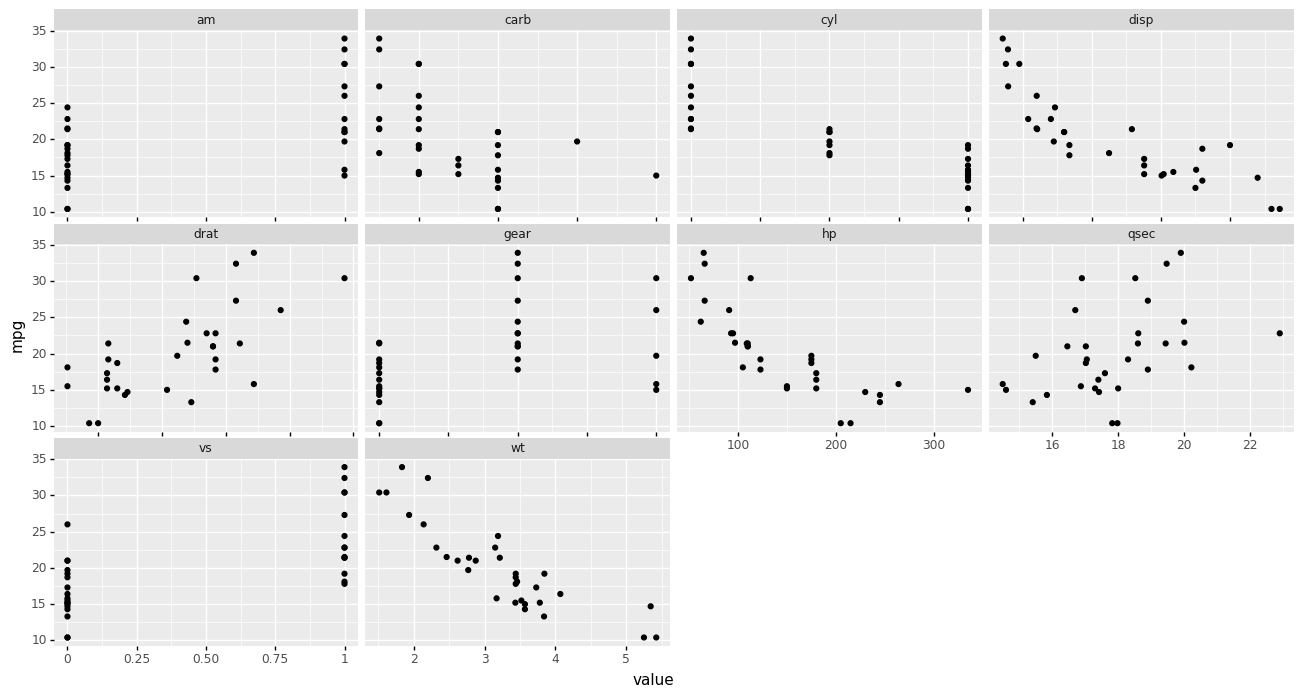

<ggplot: (284401079)>

In [8]:
# some plots with fuel efficiency as the dependent variable
# you can modify or copy/paste this as needed if you want to observe relationships in these variables visually

to_plot = mtcars.melt(id_vars=['name','mpg'])

(
    ggplot(to_plot, aes(x='value', y='mpg')) +
        geom_point() +
        facet_wrap('variable', scales='free_x') + 
        theme(figure_size=(16,8))
)

In [9]:
# Empty cells below for any additional exploratory data viz you'd like to do.

In [10]:
to_plot.head()

,name,mpg,variable,value
0,Mazda RX4,21.0,cyl,6.0
1,Mazda RX4 Wag,21.0,cyl,6.0
2,Datsun 710,22.8,cyl,4.0
3,Hornet 4 Drive,21.4,cyl,6.0
4,Hornet Sportabout,18.7,cyl,8.0


In [13]:
import statsmodels.formula.api as smf

# Trying out various models using forward selection
# model = smf.ols("Sales ~ TV", data=advertising)
# model = smf.ols("Sales ~ Radio", data=advertising)
# model = smf.ols("Sales ~ Newspaper", data=advertising)
# model = smf.ols("Sales ~ TV + Radio + Newspaper", data=advertising)
model = smf.ols("Sales ~ TV + Radio", data=advertising)
results = model.fit()
results.summary()

NameError: name 'advertising' is not defined

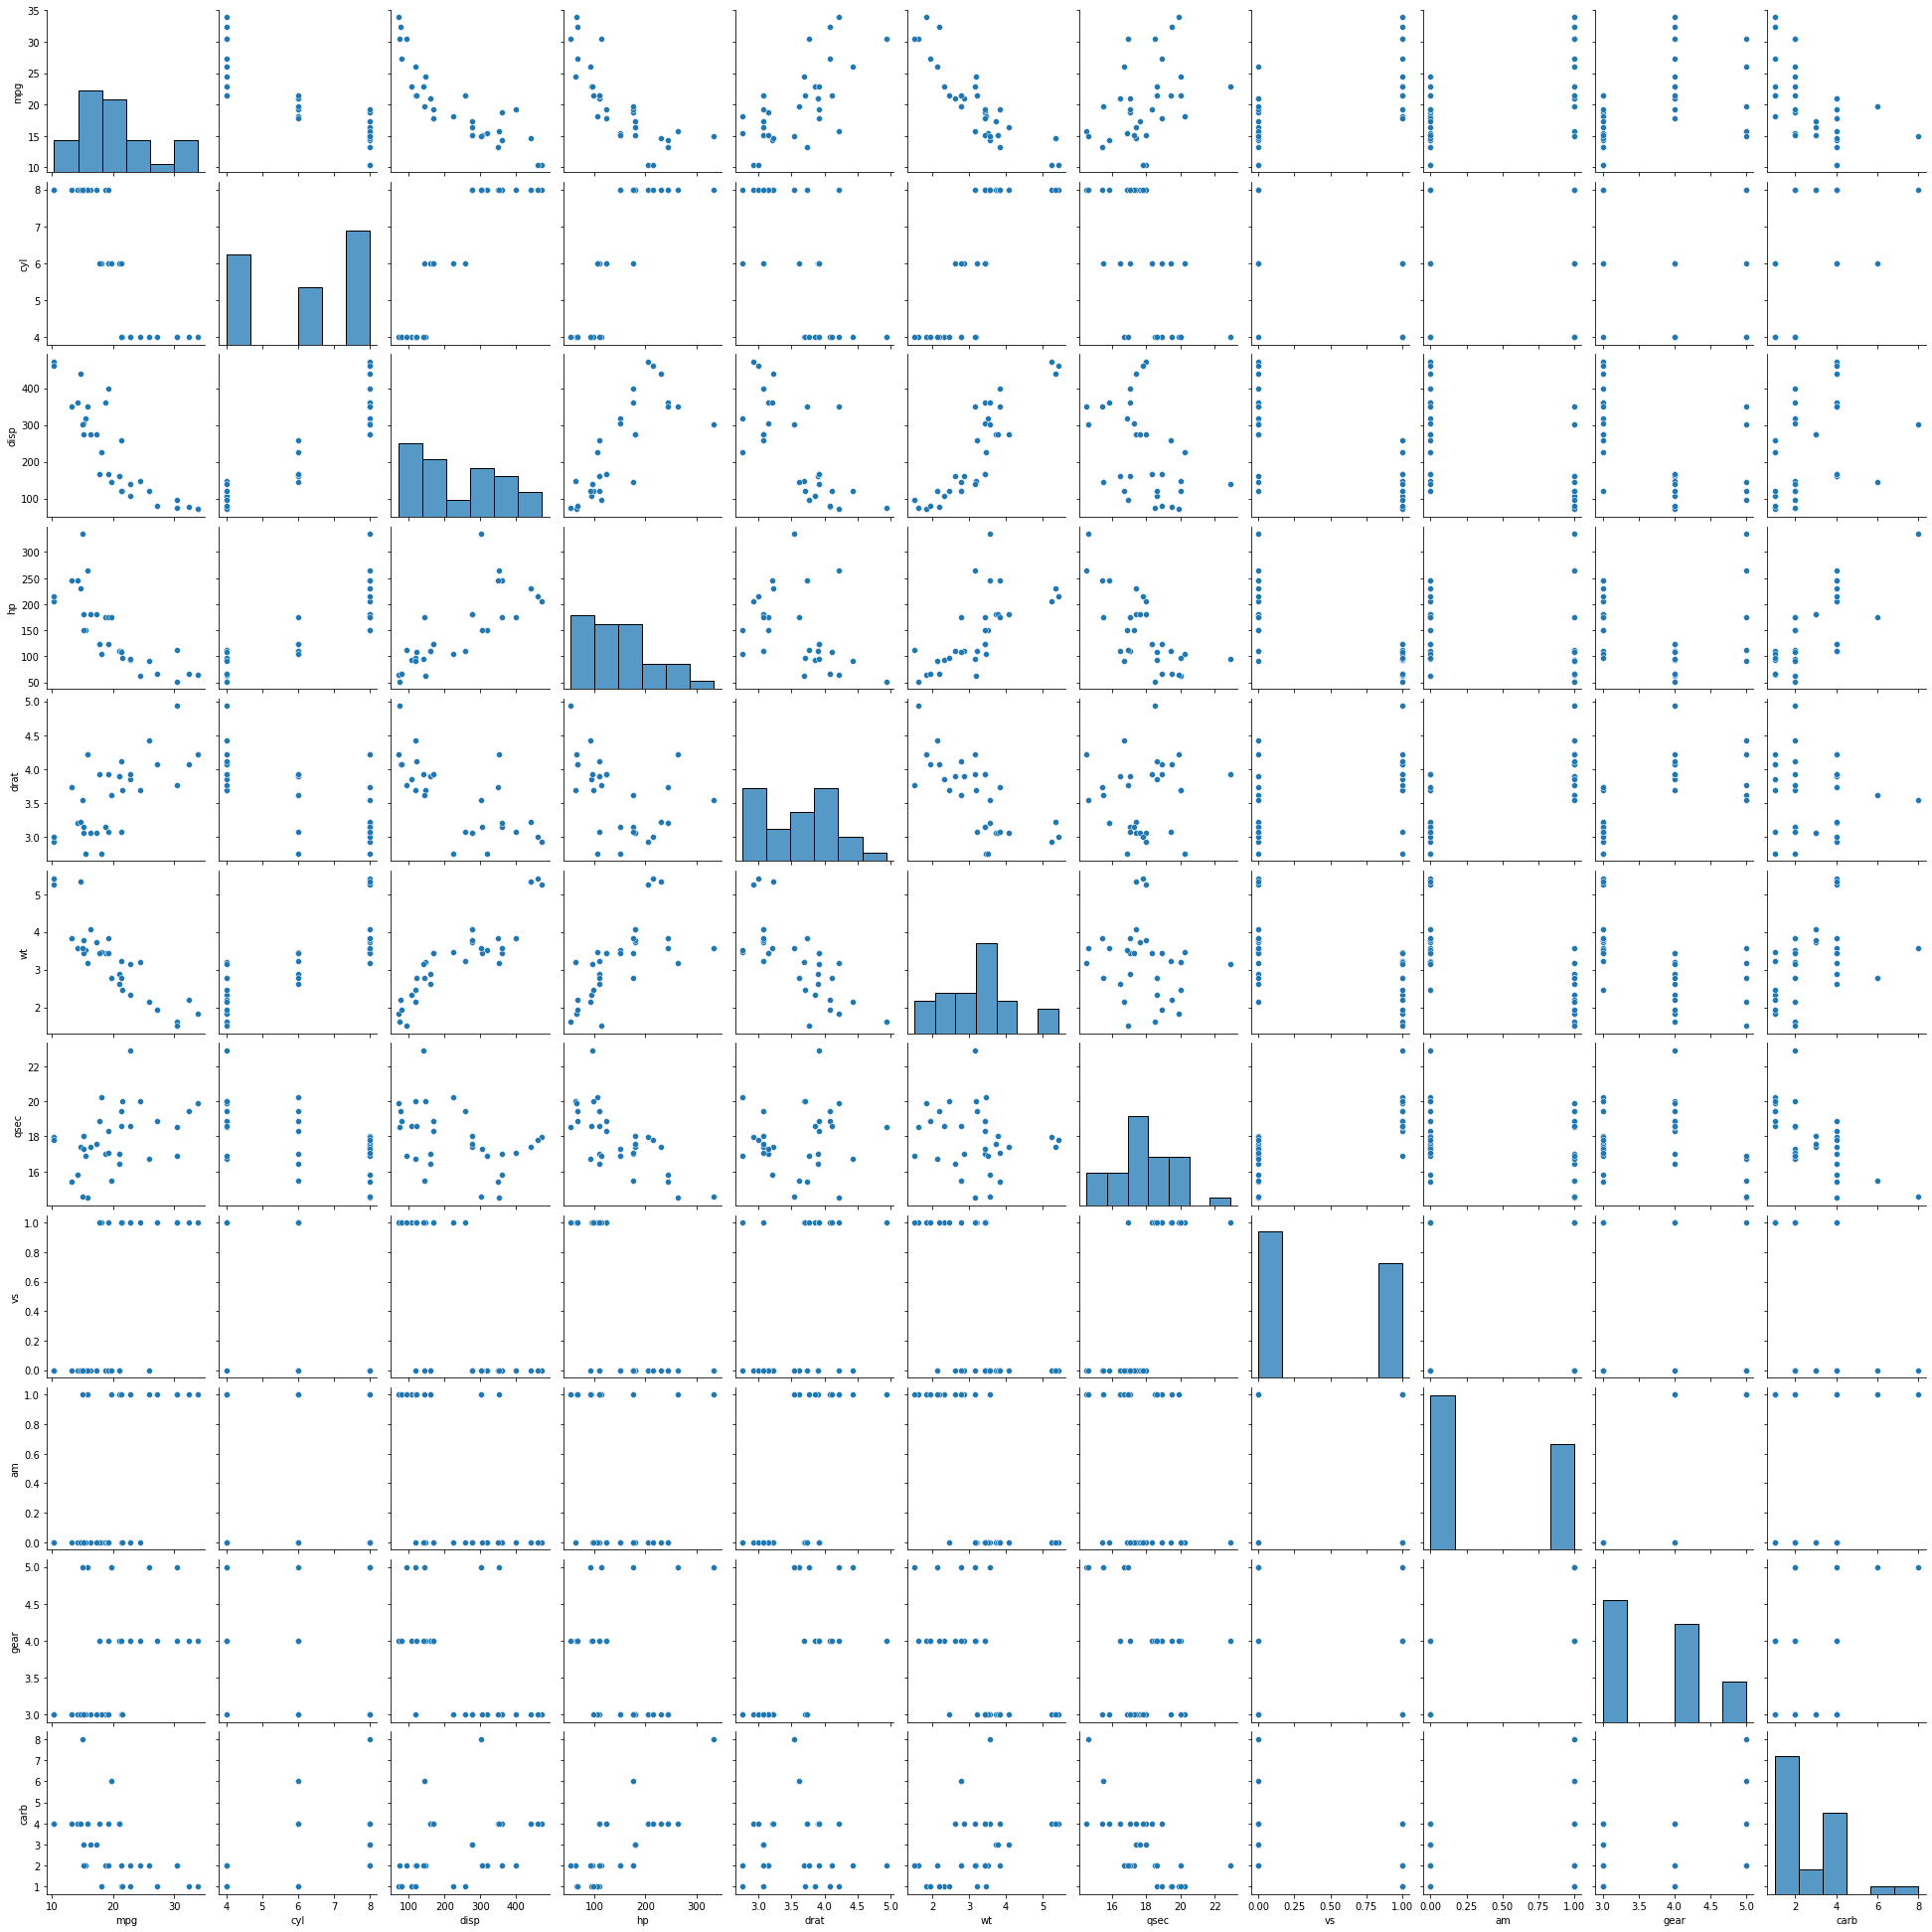

In [14]:
# # Pairplots...(uncomment to see this neat trick that Plotnine doesn't support yet)
import seaborn as sns
sns.pairplot(mtcars)

#things to look at: 
    # mpg + disp 
    # hp + disp 
    # mpg + hp 
    # disp + wt
    # drat + wt
    # mpg + wt 

# Regression models

In [16]:
# Here is a cell with a linear regression on mtcars to get you started
# mpg ~ wt + disp
# modify the formula and paste in subsequent cells to run different models
# you can use forward selection, backwards selection, or your own approach

import statsmodels.formula.api as smf

model = smf.ols("mpg ~ wt + hp", data=mtcars)
results = model.fit()
results.summary()

#things to look at: 
    # mpg + disp 
    # hp + disp 
    # mpg + hp 
    # disp + wt
    # drat + wt
    # mpg + wt 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     69.21
Date:                Tue, 22 Feb 2022   Prob (F-statistic):           9.11e-12
Time:                        13:37:26   Log-Likelihood:                -74.326
No. Observations:                  32   AIC:                             154.7
Df Residuals:                      29   BIC:                             159.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.2273      1.599     23.285      0.000      33.957      40.497
wt            -3.8778      0.633     -6.129      0.000      -5.172      -2.584
hp            -0.0318      0.009     -3.519      0.001      -0.050      -0.013
==============================================================================
Omnibus:                        5.303   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.071   Jarque-Bera (JB):                4.046
Skew:                           0.855   Prob(JB):                        0.132
Kurtosis:                       3.332   Cond. No.                         588.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

👉 In the cells below, use either forward or backward selection to identify a model that fits this data and best explains the differences in a car's fuel efficiency. You can try various different models, see how they perform.

Remember, these aren't just abstract numbers in a vacuum. They are real data about real cars. Each variable has a meaning. Before just dropping it in your regression, as yourself what it means to explain the variance in `mpg` using that variable. Does that **methodological choice** make sense? 

In [13]:

import statsmodels.formula.api as smf

model = smf.ols("drat ~ wt", data=mtcars)
results = model.fit()
results.summary()

# Adjusted R-squared = 0.491
# p-values = 0, 0
# Conclusion: the relationship between rear axel ratio (or torque) and weight  accounts for just under 50% of the variation



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   drat   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     30.92
Date:                Fri, 18 Feb 2022   Prob (F-statistic):           4.78e-06
Time:                        15:05:05   Log-Likelihood:                -13.529
No. Observations:                  32   AIC:                             31.06
Df Residuals:                      30   BIC:                             33.99
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8491      0.235     20.624      0.000       4.369       5.329
wt            -0.3893      0.070     -5.561      0.000      -0.532      -0.246
==============================================================================
Omnibus:                        0.998   Durbin-Watson:                   1.557
Prob(Omnibus):                  0.607   Jarque-Bera (JB):                0.865
Skew:                          -0.133   Prob(JB):                        0.649
Kurtosis:                       2.240   Cond. No.                         12.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
#***
import statsmodels.formula.api as smf

model = smf.ols("mpg ~ cyl + wt", data=mtcars)
results = model.fit()
results.summary()

# Adjusted R-squared = 0.819
# p-values = 0, 0.001, 0
# Conclusion: The relationship between cylinder count, fuel efficiency, and car weight accounts for roughly 82% of variation
    # which is pretty good!

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     70.91
Date:                Fri, 18 Feb 2022   Prob (F-statistic):           6.81e-12
Time:                        15:40:27   Log-Likelihood:                -74.005
No. Observations:                  32   AIC:                             154.0
Df Residuals:                      29   BIC:                             158.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.6863      1.715     23.141      0.000      36.179      43.194
cyl           -1.5078      0.415     -3.636      0.001      -2.356      -0.660
wt            -3.1910      0.757     -4.216      0.000      -4.739      -1.643
==============================================================================
Omnibus:                        4.628   Durbin-Watson:                   1.671
Prob(Omnibus):                  0.099   Jarque-Bera (JB):                3.426
Skew:                           0.789   Prob(JB):                        0.180
Kurtosis:                       3.287   Cond. No.                         27.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
# *** 
model = smf.ols("wt ~ hp + wt:cyl", data=mtcars)
results = model.fit()
results.summary()
# https://stackoverflow.com/questions/40196847/how-to-make-a-loop-to-perform-regressions-across-a-dataframe-python

# Adjusted R-squared = 0.918
# p-values = 0, 0.015, 0 
# Conclusion: The relationship between weight, horsepower, weight and cylinder count (relative to each other) accounts
    # for roughly 91% of the variation in the data 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     wt   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     174.5
Date:                Fri, 18 Feb 2022   Prob (F-statistic):           6.76e-17
Time:                        15:39:40   Log-Likelihood:                -3.1166
No. Observations:                  32   AIC:                             12.23
Df Residuals:                      29   BIC:                             16.63
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5741      0.120     13.108      0.000       1.329       1.820
hp            -0.0030      0.001     -2.578      0.015      -0.005      -0.001
wt:cyl         0.0983      0.007     13.602      0.000       0.083       0.113
==============================================================================
Omnibus:                        1.266   Durbin-Watson:                   1.168
Prob(Omnibus):                  0.531   Jarque-Bera (JB):                1.212
Skew:                           0.417   Prob(JB):                        0.546
Kurtosis:                       2.537   Cond. No.                         395.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
model = smf.ols("mpg ~ cyl + disp", data=mtcars)
results = model.fit()
results.summary()

# Adjusted R-squared = 0.743
# p-values = 0, 0.034, 0.054
# Conclusion: The relationship between fuel efficiency, cylinder count and engine power accounts for 74% of the variation
    
# Questions: 
    # when running regressions, how important is it to keep values below 0.05? does a few thousandth's above mean that much? 
        # in other words, is that enough to negate the result as not statistically significant? 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     45.81
Date:                Fri, 18 Feb 2022   Prob (F-statistic):           1.06e-09
Time:                        15:36:01   Log-Likelihood:                -79.573
No. Observations:                  32   AIC:                             165.1
Df Residuals:                      29   BIC:                             169.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.6610      2.547     13.609      0.000      29.452      39.870
cyl           -1.5873      0.712     -2.230      0.034      -3.043      -0.131
disp          -0.0206      0.010     -2.007      0.054      -0.042       0.000
==============================================================================
Omnibus:                        3.200   Durbin-Watson:                   1.596
Prob(Omnibus):                  0.202   Jarque-Bera (JB):                2.660
Skew:                           0.701   Prob(JB):                        0.264
Kurtosis:                       2.822   Cond. No.                     1.27e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
model = smf.ols("disp ~ mpg", data=mtcars)
results = model.fit()
results.summary()

# when adding weight here, suddenly disp loses its statistical significance, why might that happen?


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   disp   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     76.51
Date:                Tue, 22 Feb 2022   Prob (F-statistic):           9.38e-10
Time:                        13:46:59   Log-Likelihood:                -178.86
No. Observations:                  32   AIC:                             361.7
Df Residuals:                      30   BIC:                             364.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    580.8838     41.740     13.917      0.000     495.639     666.128
mpg          -17.4291      1.993     -8.747      0.000     -21.498     -13.360
==============================================================================
Omnibus:                        1.275   Durbin-Watson:                   1.539
Prob(Omnibus):                  0.529   Jarque-Bera (JB):                1.234
Skew:                           0.389   Prob(JB):                        0.539
Kurtosis:                       2.434   Cond. No.                         74.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:

#things to look at: 
    # mpg + disp 
    # hp + disp 
    # mpg + hp 
    # disp + wt
    # drat + wt
    # mpg + wt 

In [26]:
model = smf.ols("mpg ~ disp + hp", data=mtcars)
results = model.fit()
results.summary()

# Adjusted R-squared = 0.731
# p-values = 0, 0, 0.074
# Conclusion: The relationship between fuel efficiency, engine power, and horse power accounts for 73% of the variation
    # but result is not quite statistically significant 
    

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     43.09
Date:                Tue, 22 Feb 2022   Prob (F-statistic):           2.06e-09
Time:                        13:48:19   Log-Likelihood:                -80.309
No. Observations:                  32   AIC:                             166.6
Df Residuals:                      29   BIC:                             171.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.7359      1.332     23.083      0.000      28.013      33.459
disp          -0.0303      0.007     -4.098      0.000      -0.045      -0.015
hp            -0.0248      0.013     -1.856      0.074      -0.052       0.003
==============================================================================
Omnibus:                        3.082   Durbin-Watson:                   1.370
Prob(Omnibus):                  0.214   Jarque-Bera (JB):                2.788
Skew:                           0.680   Prob(JB):                        0.248
Kurtosis:                       2.508   Cond. No.                         733.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
model = smf.ols("mpg ~ drat + hp", data=mtcars)
results = model.fit()
results.summary()


# Adjusted R-squared = 0.723
# p-values = 0.042, 0, 0
# Conclusion: The relationship between fuel efficiency, rear axel ratio (or torque), and horse power accounts for 72% of the variation
    # but result is not quite statistically significant 
    

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     41.52
Date:                Tue, 22 Feb 2022   Prob (F-statistic):           3.08e-09
Time:                        13:54:36   Log-Likelihood:                -80.752
No. Observations:                  32   AIC:                             167.5
Df Residuals:                      29   BIC:                             171.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.7899      5.078      2.125      0.042       0.405      21.175
drat           4.6982      1.192      3.943      0.000       2.261       7.135
hp            -0.0518      0.009     -5.573      0.000      -0.071      -0.033
==============================================================================
Omnibus:                        5.471   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.065   Jarque-Bera (JB):                4.237
Skew:                           0.877   Prob(JB):                        0.120
Kurtosis:                       3.317   Cond. No.                     1.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Paste the model that you think best explains the variance in fuel efficiency below 👉

In [32]:
model = smf.ols("mpg ~ cyl + wt", data=mtcars)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     70.91
Date:                Tue, 22 Feb 2022   Prob (F-statistic):           6.81e-12
Time:                        13:51:41   Log-Likelihood:                -74.005
No. Observations:                  32   AIC:                             154.0
Df Residuals:                      29   BIC:                             158.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.6863      1.715     23.141      0.000      36.179      43.194
cyl           -1.5078      0.415     -3.636      0.001      -2.356      -0.660
wt            -3.1910      0.757     -4.216      0.000      -4.739      -1.643
==============================================================================
Omnibus:                        4.628   Durbin-Watson:                   1.671
Prob(Omnibus):                  0.099   Jarque-Bera (JB):                3.426
Skew:                           0.789   Prob(JB):                        0.180
Kurtosis:                       3.287   Cond. No.                         27.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Next steps

Woohoo! We totally understand how engineers in the 1970s designed cars right? Our regressions answered all of our questions? Time to write an article?

...As you can probably tell, we're not quite there yet.

This analysis may have answered some questions that you had but raised others.

What have you learned about each of the following variables and their impact on fuel efficiency?

- cyl (Number of Cylinders)
- disp (Displacement cu.in.)
- hp (Gross horsepower)
- drat (Rear axle ratio)
- wt (Weight)
- qsec (1/4 mile time)
- vs (Engine type - V-shape or Straight)
- am (Transmission Type - Autmoatic or Manaul)
- gear (Number of gears in the transmission)
- carb (Number of carburetor barrels)

Game out what your next steps would be. If you have the opportunity to speak to a car expert (hint: you will!) and the opportunity to speak to a stats expert (hint: you will!) what would you ask them?


## Reporting

Car design has evolved significantly since this dataset was published. Your goal is to understand what made a car fuel efficient (or not) in the 1970s/80s. What were the tradeoffs that a car maker had to make? How did those tradeoffs impact fuel effienceny? How are these variables all related to one another?

# What are 3-5 questions you have for a domain expert?
- Does the number of cylinders impact a car's fuel efficiency? 
    - Would weight play a factor in this relationship? 
- Would you expect a car's number of cylinders or engine power to be a better determination of fuel effiency? 
- In your opinion, what is the best indicator of fuel efficiency from cars of this period? 
- How might engine power or rear axel ratio play a role in determining fuel efficiency? 

# What are 3-5 questions you have for a statistician?
- When exploring colinearity, does each variable need to be included in addition to the colinear variable? Why? 
- Sometimes when adding parameters, the p-values shoot up. What's happening in the background statistically to make that happen? 
- When do you know to look into colinearity as opposed to spliting each variable individually? 